## Hierarchial Clustering on Crime Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import normalize
from sklearn.cluster import AgglomerativeClustering

%matplotlib inline

In [2]:
crime_data=pd.read_csv("C:/Users/samee/OneDrive/Documents/ExcelR/Assignment-07/crime_data.csv")

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [4]:
crime_data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
crime_data.tail()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [6]:
crime_data1=crime_data.rename(columns={'Unnamed: 0':'States'})

In [7]:
crime_data1.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [8]:
crime_data1.tail()

,States,Murder,Assault,UrbanPop,Rape
45,Virginia,8.5,156,63,20.7
46,Washington,4.0,145,73,26.2
47,West Virginia,5.7,81,39,9.3
48,Wisconsin,2.6,53,66,10.8
49,Wyoming,6.8,161,60,15.6


In [9]:
crime_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   States    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [10]:
crime_data1.isna().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [11]:
crime_data1.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

<AxesSubplot:>

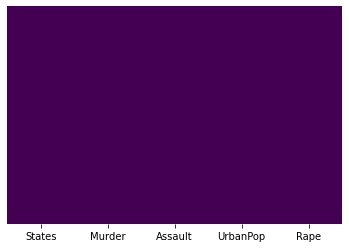

In [12]:
sns.heatmap(crime_data1.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [13]:
crime_data1[crime_data1.duplicated()].shape
crime_data1.shape

(0, 5)

(50, 5)

In [14]:
crime_data1.drop_duplicates().head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [15]:
crime_data2=crime_data1.drop(columns='States',axis=1)

In [16]:
crime_data2.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [17]:
## Normalizing

crime_norm=pd.DataFrame(normalize(crime_data2),columns=crime_data2.columns)
crime_norm

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


In [18]:
## Create Dendrograms

## Complete-linkage: calculates the maximum distance between clusters before merging.
## Single-linkage: calculates the minimum distance between the clusters before merging. 
## Average-linkage: calculates the average distance between clusters before merging.
## Centroid-linkage: finds centroid of cluster 1 and centroid of cluster 2, 
##and then calculates the distance between the two before merging.

<Figure size 1080x504 with 0 Axes>

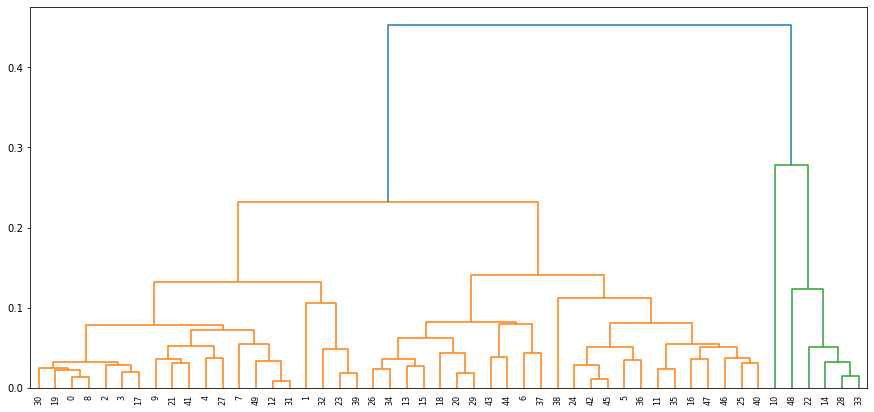

In [19]:
plt.figure(figsize=(15,7))
dendograms=sch.dendrogram(sch.linkage(crime_norm,'average'))

In [20]:
## Creating Clusters

hcluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [21]:
y=pd.DataFrame(hcluster.fit_predict(crime_norm),columns=['ClusterID'])
y['ClusterID'].value_counts()

0    24
2    20
1     6
Name: ClusterID, dtype: int64

In [22]:
hcluster.labels_

array([2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0, 2, 0, 2,
       1, 2, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 1, 2], dtype=int64)

In [23]:
crime_data2['ClusterID']=hcluster.labels_

In [24]:
crime_data2.head()

,Murder,Assault,UrbanPop,Rape,ClusterID
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,2


In [25]:
crime_data2=crime_data2.join(crime_data1['States'])
crime_data2.head()

,Murder,Assault,UrbanPop,Rape,ClusterID,States
0,13.2,236,58,21.2,2,Alabama
1,10.0,263,48,44.5,2,Alaska
2,8.1,294,80,31.0,2,Arizona
3,8.8,190,50,19.5,2,Arkansas
4,9.0,276,91,40.6,2,California


In [26]:
max_states=crime_data2['States'].max()
max_states

'Wyoming'

<Figure size 1080x504 with 0 Axes>

Text(0.5, 1.0, 'Clusters of Crime Data')

Text(0.5, 0, 'ClusterID')

Text(0, 0.5, 'UrbanPop')

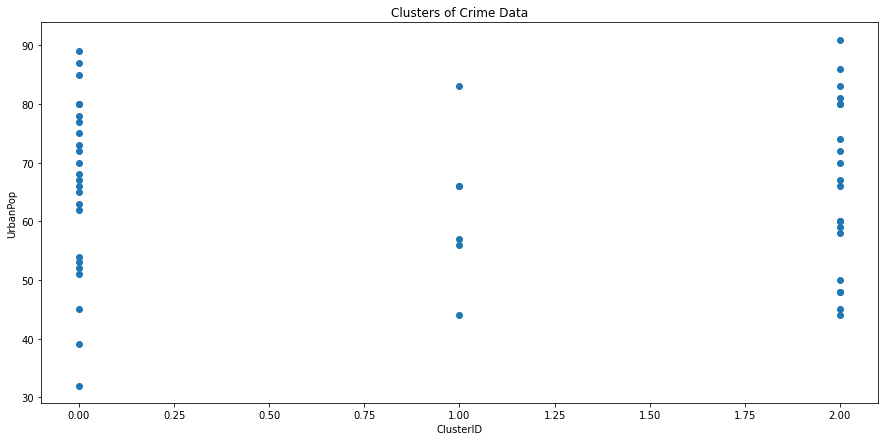

In [27]:
plt.figure(figsize=(15,7))
plt.scatter(x=crime_data2['ClusterID'],y=(crime_data2['UrbanPop']))
plt.title('Clusters of Crime Data')
plt.xlabel('ClusterID')
plt.ylabel('UrbanPop')

In [28]:
crime_data2.groupby("ClusterID").agg(['mean']).reset_index()

,ClusterID,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,5.770833,129.083333,65.958333,18.575000
1,1,2.616667,54.833333,62.000000,12.333333
2,2,11.760000,255.550000,66.100000,27.090000


In [29]:
## Therefor , from Heirarchial Clustering , 
## we specified 3 clusters and got above results

## For eg- For cluster 1, Average Murder rate is 5.77,Assualt is 129,Rape average is 18.57

## KMeans Clustering on Crime Data

In [30]:
from sklearn.cluster import KMeans

In [31]:
crime1=pd.read_csv("C:/Users/samee/OneDrive/Documents/ExcelR/Assignment-07/crime_data.csv")

In [32]:
crime1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [33]:
crime2=crime1.rename(columns={'Unnamed: 0':'States'})
crime2.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [34]:
crime2.isnull().sum()

States      0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [35]:
crime2[crime2.duplicated()].shape

(0, 5)

In [36]:
crime3=crime2.drop(columns='States',axis=1)
crime3.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [37]:
## Standardizing and Normalizing

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_crime_data=scaler.fit_transform(crime3)
scaled_crime_data

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [38]:
## scaled_crime_data.fit_transform(crime3.iloc[:,:])

In [39]:
from sklearn.cluster import KMeans

In [40]:
wcss=[]

for i in range(1,5):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(scaled_crime_data)
    wcss.append(kmeans.inertia_)

C:\Users\samee\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=1, random_state=0)

KMeans(n_clusters=2, random_state=0)

KMeans(n_clusters=3, random_state=0)

KMeans(n_clusters=4, random_state=0)

In [41]:
wcss

[200.0, 104.96163315756873, 80.08886132199619, 57.55425863091106]

In [42]:
kmeans.inertia_

57.55425863091106

<Figure size 1080x504 with 0 Axes>

Text(0.5, 1.0, 'Elbow Method')

Text(0.5, 0, 'Number of Clusters')

Text(0, 0.5, 'WCSS')

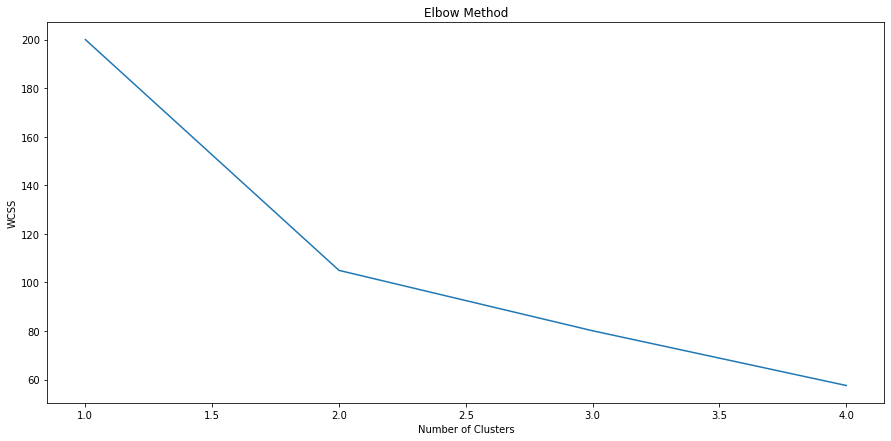

In [43]:
## Plotting

plt.figure(figsize=(15,7))
plt.plot(range(1,5),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [44]:
## fit() method will fit the model to the input training instances 
## while predict() will perform predictions on the testing instances, 
## based on the learned parameters during fit 

In [45]:
## Checking Elbow Breaking

clusters_new=KMeans(n_clusters=2,random_state=0)
clusters_new.fit(scaled_crime_data)

KMeans(n_clusters=2, random_state=0)

In [46]:
clusters_new.labels_

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0])

In [47]:
clusters_new.cluster_centers_

array([[-0.67675778, -0.68274685, -0.13306084, -0.57037591],
       [ 1.01513667,  1.02412028,  0.19959126,  0.85556386]])

In [48]:
crime3['Clusters']=clusters_new.labels_

In [49]:
crime3.head()

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1


In [50]:
crime3.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,4.870,114.433333,63.633333,15.943333
1,1,12.165,255.250000,68.400000,29.165000


In [51]:
## Therefore from KMeans , we got elbow Break at 2, so we have done K-Means
## Clustering based on 2 clusters and got the above output

## DBScan Clustering on Crime Data

In [52]:
from sklearn.cluster import DBSCAN

In [53]:
## Here taking the above data 

db_crime=crime3
db_crime.head()

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,1
1,10.0,263,48,44.5,1
2,8.1,294,80,31.0,1
3,8.8,190,50,19.5,0
4,9.0,276,91,40.6,1


In [54]:
db_crime.tail()

,Murder,Assault,UrbanPop,Rape,Clusters
45,8.5,156,63,20.7,0
46,4.0,145,73,26.2,0
47,5.7,81,39,9.3,0
48,2.6,53,66,10.8,0
49,6.8,161,60,15.6,0


In [55]:
db_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
 4   Clusters  50 non-null     int32  
dtypes: float64(2), int32(1), int64(2)
memory usage: 1.9 KB


In [56]:
db_crime.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
Clusters    0
dtype: int64

<AxesSubplot:>

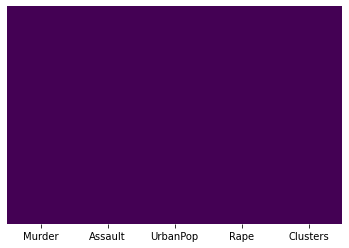

In [57]:
sns.heatmap(db_crime.isnull(),cmap='viridis',cbar=False,yticklabels=False)

In [58]:
array=db_crime.values
array

array([[ 13.2, 236. ,  58. ,  21.2,   1. ],
       [ 10. , 263. ,  48. ,  44.5,   1. ],
       [  8.1, 294. ,  80. ,  31. ,   1. ],
       [  8.8, 190. ,  50. ,  19.5,   0. ],
       [  9. , 276. ,  91. ,  40.6,   1. ],
       [  7.9, 204. ,  78. ,  38.7,   1. ],
       [  3.3, 110. ,  77. ,  11.1,   0. ],
       [  5.9, 238. ,  72. ,  15.8,   0. ],
       [ 15.4, 335. ,  80. ,  31.9,   1. ],
       [ 17.4, 211. ,  60. ,  25.8,   1. ],
       [  5.3,  46. ,  83. ,  20.2,   0. ],
       [  2.6, 120. ,  54. ,  14.2,   0. ],
       [ 10.4, 249. ,  83. ,  24. ,   1. ],
       [  7.2, 113. ,  65. ,  21. ,   0. ],
       [  2.2,  56. ,  57. ,  11.3,   0. ],
       [  6. , 115. ,  66. ,  18. ,   0. ],
       [  9.7, 109. ,  52. ,  16.3,   0. ],
       [ 15.4, 249. ,  66. ,  22.2,   1. ],
       [  2.1,  83. ,  51. ,   7.8,   0. ],
       [ 11.3, 300. ,  67. ,  27.8,   1. ],
       [  4.4, 149. ,  85. ,  16.3,   0. ],
       [ 12.1, 255. ,  74. ,  35.1,   1. ],
       [  2.7,  72. ,  66. ,  14

In [59]:
## Standardizing/Normalizing the Data

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaled_db_crime=scaler.fit_transform(array)
scaled_db_crime

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  1.22474487],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  1.22474487],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  1.22474487],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.81649658],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  1.22474487],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  1.22474487],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.81649658],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.81649658],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  1.22474487],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293,  1.22474487],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -0.81649658],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217, -0.81649658],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  1.22474487],
       [-0.13637203, -0.70012057, -0.0

In [60]:
dbscan=DBSCAN(eps=2,min_samples=4)
dbscan

DBSCAN(eps=2, min_samples=4)

In [61]:
dbscan.fit(scaled_db_crime)

DBSCAN(eps=2, min_samples=4)

In [62]:
dbscan.labels_

array([ 0, -1,  0,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  0,  1,  1,  0,  1,  1,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  0,  1,  0,  0,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [63]:
db_crime['Clusters']=dbscan.labels_

In [64]:
db_crime.head()

,Murder,Assault,UrbanPop,Rape,Clusters
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,0
3,8.8,190,50,19.5,1
4,9.0,276,91,40.6,0


<Figure size 720x504 with 0 Axes>

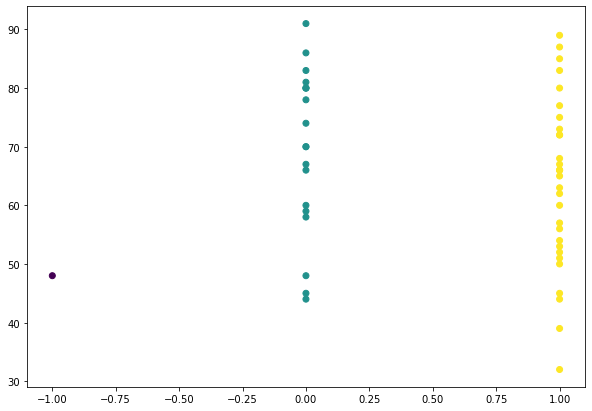

In [65]:
plt.figure(figsize=(10, 7))  
plt.scatter(db_crime['Clusters'],db_crime['UrbanPop'], c=dbscan.labels_) 

In [66]:
db_crime.groupby('Clusters').agg(['mean']).reset_index()

,Clusters,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,-1,10.000000,263.000000,48.000000,44.500000
1,0,12.278947,254.842105,69.473684,28.357895
2,1,4.870000,114.433333,63.633333,15.943333


In [67]:
## Therefore , using DBScan we got 3 Clusters as above